In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
sample = mnist.train.images[2].reshape(28,28)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

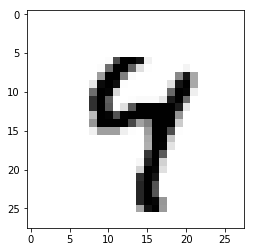

In [8]:
plt.imshow(sample,cmap='Greys')

In [9]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_classes = 10
n_samples = mnist.train.num_examples
n_input = 784
n_hidden_1 = 256 # pallete size
n_hidden_2 = 256


In [10]:
x = tf.placeholder(tf.float32,[None, n_input])

In [11]:
W = tf.Variable(tf.zeros([n_input,n_classes]))

In [12]:
b = tf.Variable(tf.zeros([n_classes]))

In [13]:
y = tf.nn.softmax(tf.matmul(x,W)+b)

In [14]:
y_ = tf.placeholder(tf.float32,[None, n_classes])

In [15]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [16]:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [17]:
sess = tf.InteractiveSession()

In [18]:
tf.global_variables_initializer().run()

In [19]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    

In [20]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [21]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.7896


#### Tensorflow Basics

In [23]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for data input
    weights: dictionary of weights
    biases: dictionary of bias values
    '''
    # First hidden layer with RELU Activation function
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # Fund(X*W+B) = NELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)

    # Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Output layer
    out_layer = tf.matmul(layer_2,weights['out'])+biases['out']
    

In [24]:
weights = {'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
           'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
           'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
          }

In [25]:
weights

{'h1': <tf.Variable 'Variable_2:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_3:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_4:0' shape=(256, 10) dtype=float32_ref>}

In [26]:
biases = {'b1': tf.Variable(tf.random_normal([n_hidden_1])),
           'b2': tf.Variable(tf.random_normal([n_hidden_2])),
           'out': tf.Variable(tf.random_normal([n_classes]))
          }

In [27]:
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_classes])



In [28]:
pred = multilayer_perceptron(x,weights,biases)

In [30]:
cost = tf.reduce_mean(tf.nn.softmax(pred,y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

ValueError: None values not supported.